### Hipótese 5 (KNN)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível predizer a classificação indicativa de um game baseado em seu gênero e suas vendas?

In [2]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0
5,Tetris,GB,1989,Puzzle,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366655,...,0,0,0,1,0,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,0.272727,0.315608,0.636008,0.272469,0.361081,...,0,0,0,1,0,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350418,...,0,0,0,1,0,0,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.349130,0.239641,0.459883,0.211921,0.343148,...,0,0,0,1,0,0,0,0,0,0
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.651112,0.021754,0.027397,0.044465,0.343027,...,0,0,0,1,0,0,0,0,0,0


In [4]:
all_sales = df.loc[:, 'NA_Sales':'Global_Sales'].copy()
all_genres = df.loc[:,'Action':'Strategy'].copy()

X = all_sales.join(all_genres).copy()
y = df["Rating"].copy()

In [5]:
knn = KNeighborsClassifier()
knn_scores = []

kf = KFold(n_splits = 20, shuffle = True, random_state = 42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))
    
print("Média acertos da KNeighborsClassifier:",np.mean(knn_scores))

Média acertos da KNeighborsClassifier: 0.6781651614628205


Melhor resultado obtido:  0.7158536585365853


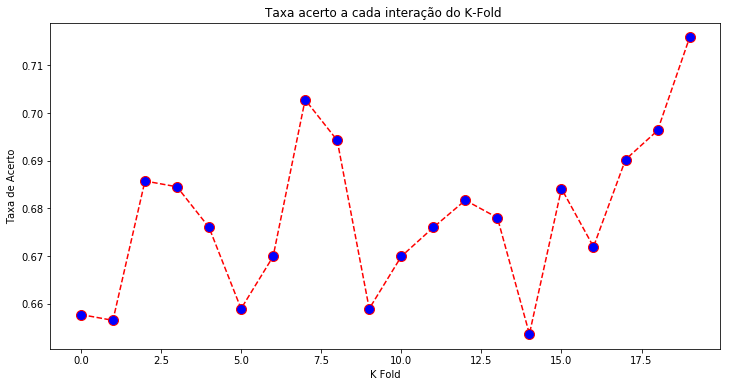

In [6]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, len(knn_scores)), knn_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto a cada interação do K-Fold ')  
plt.xlabel('K Fold')  
plt.ylabel('Taxa de Acerto')
print("Melhor resultado obtido: ",max(knn_scores))

### Parâmetros do KNeighborsClassifier:
- n_neighbors => Number of neighbors to use by default for kneighbors queries.
- weights => weight function used in prediction. Possible values:
        ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
        ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
        [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.      
- algorithm => Algorithm used to compute the nearest neighbors:
        ‘ball_tree’ will use BallTree
        ‘kd_tree’ will use KDTree
        ‘brute’ will use a brute-force search.
        ‘auto’ will attempt to decide the most appropriate algorithm based on the values passed to fit method.
- leaf_size => Leaf size passed to BallTree or KDTree. This can affect the speed of the construction and query, as well as the memory required to store the tree. The optimal value depends on the nature of the problem.
- p => p=1 (distancia de manhattan), p=2(distancia euclidiana), (p!=1 and p!=2)(distancia de minkowski)

In [7]:
# Variando os parâmetros
neighbors_config = [15,50]
weights_config = ['distance','uniform']
algorithm_config = ['ball_tree']
p_config = [1,2,3]
leaf_size_config = [15,50]

knns = []

for neighbor in neighbors_config:
    for weight in weights_config:
        for algorithm in algorithm_config:
            for p in p_config:
                for leaf in leaf_size_config:
                    knns.append(KNeighborsClassifier(n_neighbors=neighbor,weights=weight,algorithm=algorithm,
                                                     p=p,leaf_size=leaf))

knns_score = [[] for i in range(len(knns))]

# knn_1 = KNeighborsClassifier(n_neighbors=15)
# knn_2 = KNeighborsClassifier(n_neighbors=50)
# knn_3 = KNeighborsClassifier(weights='distance')
# knn_4 = KNeighborsClassifier(algorithm='ball_tree')
# knn_5 = KNeighborsClassifier(algorithm='ball_tree', leaf_size=15)
# knn_6 = KNeighborsClassifier(algorithm='ball_tree', leaf_size=50)
# knn_7 = KNeighborsClassifier(algorithm='kd_tree')
# knn_8 = KNeighborsClassifier(algorithm='kd_tree', leaf_size=15)
# knn_9 = KNeighborsClassifier(algorithm='kd_tree', leaf_size=50)
# knn_10 = KNeighborsClassifier(algorithm='brute')

# scores_knn_1 = []
# scores_knn_2 = []
# scores_knn_3 = []
# scores_knn_4 = []
# scores_knn_5 = []
# scores_knn_6 = []
# scores_knn_7 = []
# scores_knn_8 = []
# scores_knn_9 = []
# scores_knn_10 = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for i in range(len(knns)):
        knns[i].fit(X_train, y_train)
        knns_score[i].append(knns[i].score(X_test, y_test))
        
    
#     knn_1.fit(X_train, y_train)
#     scores_knn_1.append(knn_1.score(X_test, y_test))
    
#     knn_2.fit(X_train, y_train)
#     scores_knn_2.append(knn_2.score(X_test, y_test))
    
#     knn_3.fit(X_train, y_train)
#     scores_knn_3.append(knn_3.score(X_test, y_test))
    
#     knn_4.fit(X_train, y_train)
#     scores_knn_4.append(knn_4.score(X_test, y_test))
    
#     knn_5.fit(X_train, y_train)
#     scores_knn_5.append(knn_5.score(X_test, y_test))
    
#     knn_6.fit(X_train, y_train)
#     scores_knn_6.append(knn_6.score(X_test, y_test))
    
#     knn_7.fit(X_train, y_train)
#     scores_knn_7.append(knn_7.score(X_test, y_test))
    
#     knn_8.fit(X_train, y_train)
#     scores_knn_8.append(knn_8.score(X_test, y_test))
    
#     knn_9.fit(X_train, y_train)
#     scores_knn_9.append(knn_9.score(X_test, y_test))
    
#     knn_10.fit(X_train, y_train)
#     scores_knn_10.append(knn_10.score(X_test, y_test))
    
best_scores_foreach_configuration = []
for i in range(len(knns_score)):
    best_scores_foreach_configuration.append(max(knns_score[i]))
    
# best_scores_foreach_configuration.append(max(scores_knn_1))
# best_scores_foreach_configuration.append(max(scores_knn_2))
# best_scores_foreach_configuration.append(max(scores_knn_3))
# best_scores_foreach_configuration.append(max(scores_knn_4))
# best_scores_foreach_configuration.append(max(scores_knn_5))
# best_scores_foreach_configuration.append(max(scores_knn_6))
# best_scores_foreach_configuration.append(max(scores_knn_7))
# best_scores_foreach_configuration.append(max(scores_knn_8))
# best_scores_foreach_configuration.append(max(scores_knn_9))
# best_scores_foreach_configuration.append(max(scores_knn_10))

best_scores_foreach_configuration

[0.7036585365853658,
 0.7036585365853658,
 0.7060975609756097,
 0.7073170731707317,
 0.7073170731707317,
 0.7085365853658536,
 0.725609756097561,
 0.724390243902439,
 0.723170731707317,
 0.723170731707317,
 0.723170731707317,
 0.724390243902439,
 0.7073170731707317,
 0.7073170731707317,
 0.705237515225335,
 0.7060975609756097,
 0.7040194884287454,
 0.702801461632156,
 0.7073170731707317,
 0.7073170731707317,
 0.7048780487804878,
 0.7048780487804878,
 0.707673568818514,
 0.7064555420219245]

In [8]:
# knns = [knn_1, knn_2, knn_3, knn_4, knn_5, knn_6, knn_7, knn_8, knn_9, knn_10]
best_score = max(best_scores_foreach_configuration)
best_knn = knns[best_scores_foreach_configuration.index(best_score)]
best_knn

KNeighborsClassifier(algorithm='ball_tree', leaf_size=15, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=1,
           weights='uniform')

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots(figsize=(40, 20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [10]:
def list_string_to_list_index(list_keys, list_string):
    list_index = []
    for i in list_string:
        list_index.append(list_keys.index(i))
    return list_index;

Normalized confusion matrix


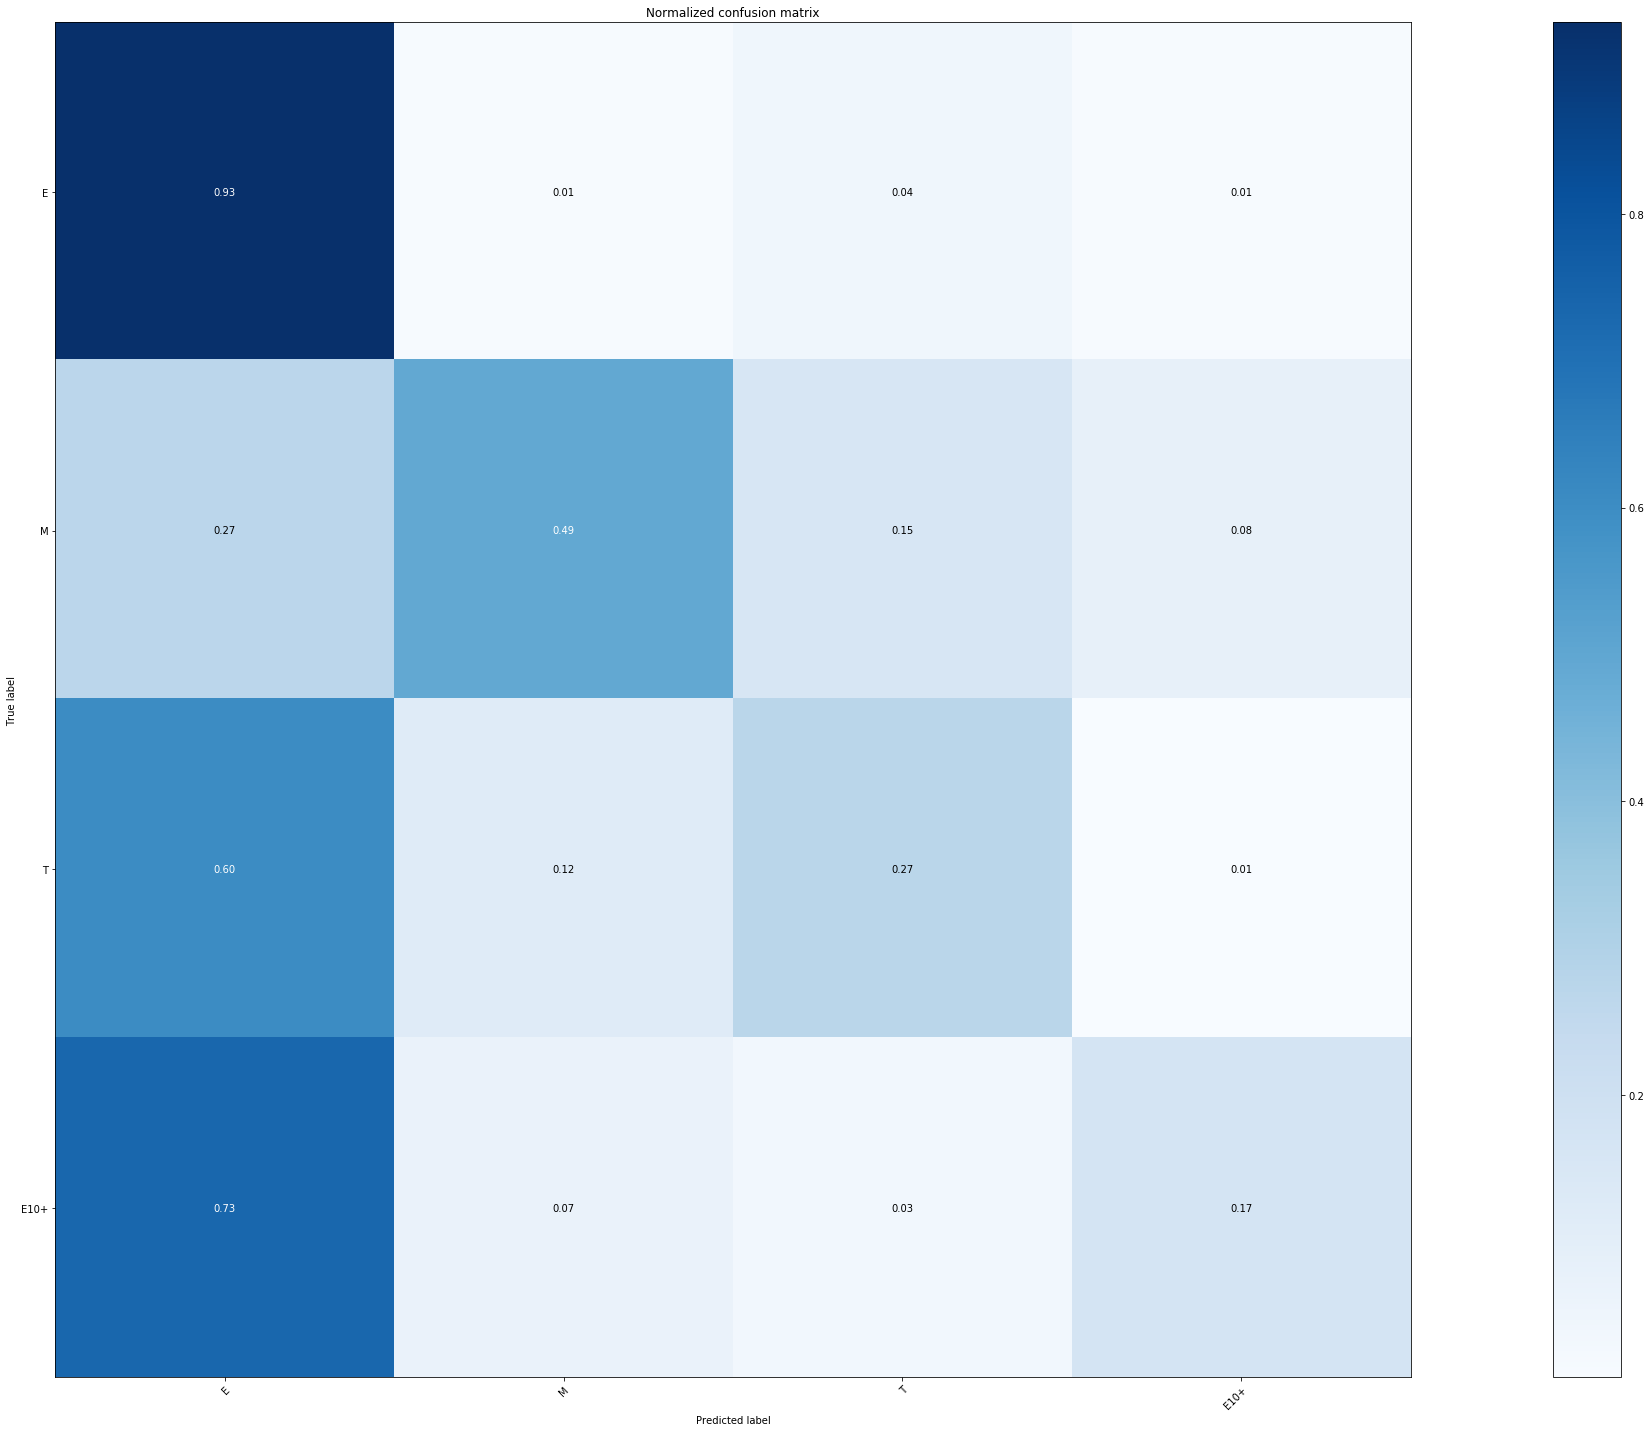

In [11]:
class_names = df["Rating"].unique()
y_pred = best_knn.predict(X_test)

y_test_index = list_string_to_list_index(list(class_names), y_test)
y_pred_index = list_string_to_list_index(list(class_names), y_pred)

plot_confusion_matrix(y_test_index, y_pred_index, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [13]:
print("\n---- TABELA DE PARÂMETROS E SCORES DE CADA CONFIGURAÇÃO DO KNN ----")
data_configs = []
indexScores = 0
for neighbor in neighbors_config:
    for weight in weights_config:
        for algorithm in algorithm_config:
            for p in p_config:
                for leaf in leaf_size_config:
                    data_configs.append([neighbor,weight,algorithm,p,leaf,
                                         'config_{}'.format(indexScores+1),
                                         '{0:.2f}%'.format((round(best_scores_foreach_configuration[indexScores] * 100,2)))])
                indexScores += 1
df_configs = pd.DataFrame(data_configs,columns=['n_neighbors','weights','algorithm','p','leaf_size','configs','score'])
df_configs.set_index(['configs'],inplace=True)
df_configs


---- TABELA DE PARÂMETROS E SCORES DE CADA CONFIGURAÇÃO DO KNN ----


,n_neighbors,weights,algorithm,p,leaf_size,score
configs,,,,,,
config_1,15,distance,ball_tree,1,15,70.37%
config_1,15,distance,ball_tree,1,50,70.37%
config_2,15,distance,ball_tree,2,15,70.37%
config_2,15,distance,ball_tree,2,50,70.37%
config_3,15,distance,ball_tree,3,15,70.61%
config_3,15,distance,ball_tree,3,50,70.61%
config_4,15,uniform,ball_tree,1,15,70.73%
config_4,15,uniform,ball_tree,1,50,70.73%
config_5,15,uniform,ball_tree,2,15,70.73%
